Load  the data

In [15]:
import pandas as pd 
import numpy as np 

In [16]:
data = pd.read_csv('../datasets/boston_housing.csv')
data.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [17]:
clean_data = data[["RM","MEDV"]].values

In [18]:
clean_data

array([[  6.57500000e+00,   5.04000000e+05],
       [  6.42100000e+00,   4.53600000e+05],
       [  7.18500000e+00,   7.28700000e+05],
       [  6.99800000e+00,   7.01400000e+05],
       [  7.14700000e+00,   7.60200000e+05],
       [  6.43000000e+00,   6.02700000e+05],
       [  6.01200000e+00,   4.80900000e+05],
       [  6.17200000e+00,   5.69100000e+05],
       [  5.63100000e+00,   3.46500000e+05],
       [  6.00400000e+00,   3.96900000e+05],
       [  6.37700000e+00,   3.15000000e+05],
       [  6.00900000e+00,   3.96900000e+05],
       [  5.88900000e+00,   4.55700000e+05],
       [  5.94900000e+00,   4.28400000e+05],
       [  6.09600000e+00,   3.82200000e+05],
       [  5.83400000e+00,   4.17900000e+05],
       [  5.93500000e+00,   4.85100000e+05],
       [  5.99000000e+00,   3.67500000e+05],
       [  5.45600000e+00,   4.24200000e+05],
       [  5.72700000e+00,   3.82200000e+05],
       [  5.57000000e+00,   2.85600000e+05],
       [  5.96500000e+00,   4.11600000e+05],
       [  

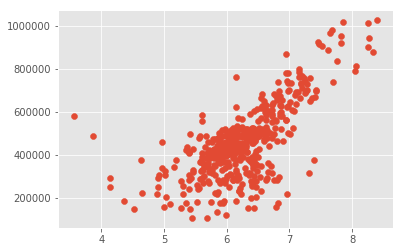

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

plt.scatter(clean_data[:,0],clean_data[:,1])
plt.show()

Function to calculate error

In [21]:
def compute_errors(m, b, points):
    total_error = 0
    for point in points:
        x = point[0]
        y = point[1]
        
        total_error += (y - (m *x + b) ) ** 2
        
    return total_error / len(points)

compute_errors(0,0,clean_data)

233709014171.77914

Code to do the calculations


In [22]:
#get the data 
def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    
    for i in range(0, len(points)):
        x = points[i,0]
        y = points[i,1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
        
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

In [23]:
points = clean_data

learning_rate = 0.01
initial_b = 0 # initial y-intercept guess
initial_m = 0 # initial slope guess
num_iterations = 10000

b = initial_b
m = initial_m
first_error = compute_errors(m,b,points)
print("We are starting at  b = ",initial_b," m = ", initial_m, "start error= ", first_error )
error_list = []
for i in range(num_iterations):
    
    b,m = step_gradient(b,m, points, learning_rate)
    error_list.append(compute_errors(m,b,points))
    
print("Ending at b = ", b, " m = ", m, "error = ", error_list[-1])
    

We are starting at  b =  0  m =  0 start error=  233709014172.0
Ending at b =  -576402.84767  m =  165318.662865 error =  14099244123.3


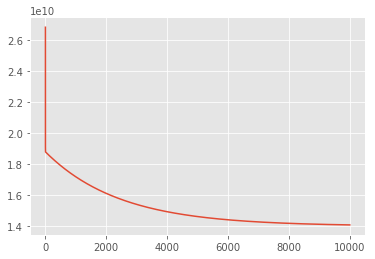

In [28]:
plt.plot(error_list)


In [ ]:
x = np.arange(1,10)
y = m*x + b
print(x)
print(y)

In [ ]:
plt.scatter(clean_data[:,0],clean_data[:,1])


plt.plot(x,y,c="g")

**References**:
1. Code and Graphs from [Atomic Object](https://spin.atomicobject.com/2014/06/24/gradient-descent-linear-regression/)

2. Boston Housing Data from [UCI](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/)

